In [2]:
# Group number 1
# 
# Team members: Stepan Perminov, Polina Ponomareva, Kirill Shcherbakov, Daniil Svirskiy

# Library importing
import numpy as np
import matplotlib.pyplot as plt

# Size of the trajectory
n = 200

# Initialization of arrays
x = np.zeros((n,1))
V = np.zeros((n,1))
z = np.zeros((n,1))

x[0] = 5
V[0] = 1
T = 1

# Variances
sigma_a2 = 0.2**2
sigma_et2 = 20**2

# Generation of normally distributed random noises with zero mathematical expectation and corresponding variances
a = np.random.normal(0, np.sqrt(sigma_a2), n-1)
et = np.random.normal(0, np.sqrt(sigma_et2), n)

# Generation of V
for i in range(1,len(V)):
    V[i] = V[i-1] + a[i-1]*T

# Generation of true trajectory x
for i in range(1,len(x)):
    x[i] = x[i-1] + V[i-1]*T + a[i-1]*T*T/2

# Generation of measurements z of the process X
for i in range(len(z)):
    z[i] = x[i] + et[i]

In [3]:
F = np.array([[1, T],[0, 1]])
G = np.array([[(T**2)/2.0],[T]])
H = np.array([1, 0])

# X = np.zeros((2,n))
Z = np.zeros((2,n))

X = np.array([[5],[1]])

X_ = X
# Generation of true trajectory X
for i in range(1,len(a)+1):
    X = np.hstack((X, F.dot(X_) + G*a[i-1]))
    X_ = F.dot(X_) + G*a[i-1]
# print(X)



In [41]:
X00 = np.array([[2],[0]])
P00 = np.array([[10000, 0],[0, 10000]])

Q = G*G.T*sigma_a2

R = sigma_et2

P_1 = np.zeros((2,2,n))
X_1 = np.zeros((2,n))

P_ = np.zeros((2,2,n))
P_[:,:,0] = [[10000, 0],[0, 10000]]

X_ = np.zeros((2,n))
X_[:,0] = [2, 0]

HT = H.reshape(2,1)
K = np.zeros((2,n))

for i in range(1,n):
    P_1[:,:,i] = (F.dot(P_[:,:,i-1])).dot(F.T) + Q
    
    X_1[:,i] = F.dot(X_[:,i-1].reshape(2,1)).reshape(2)
    K[:,i] = ((P_1[:,:,i].dot(HT))/((H.dot(P_1[:,:,i])).dot(HT) + R)).reshape(2)
    
    X_[:,i] = X_1[:,i] + K[:,i]*(z[i] - H.dot(X_1[:,i]))
    P_[:,:,i] = P_1[:,:,i] - (K[:,i].reshape(2,1)*H).dot(P_1[:,:,i])

K = np.delete(K, 0, axis = 1)

In [42]:
# X00 = np.array([[2],[0]])
# P00 = np.array([[10000, 0],[0, 10000]])

# Q = G*G.T*sigma_a2

# R = sigma_et2

# P10 = (F.dot(P00)).dot(F.T) + Q
# X10 = F.dot(X00)

# HT = H.reshape(2,1)
# K1= (P10.dot(HT))/((H.dot(P10)).dot(HT) + R)

# X11 = X10 + K1*(z[1] - H.dot(X10))

# P11 = P10 - (K1*H).dot(P10)
# # P11 = (K1*H)

# P21 = (F.dot(P11)).dot(F.T) + Q
# X21 = F.dot(X11)

# HT = H.reshape(2,1)
# K2= (P21.dot(HT))/((H.dot(P21)).dot(HT) + R)

# X22 = X21 + K2*(z[2] - H.dot(X21))

# P_1 = np.zeros((2,2,n))
# X_1 = np.zeros((2,n))

# P_ = np.zeros((2,2,n))
# P_[:,:,0] = np.array([[10000, 0],[0, 10000]])

# X_ = np.zeros((2,n))
# X_[0,0] = 2
# X_[1,0] = 0

# HT = H.reshape(2,1)
# K = np.zeros((2,n))

# for i in range(1,n):
#     P_1[:,:,i] = (F.dot(P_[:,:,i-1])).dot(F.T) + Q
#     X_1[:,i] = F.dot(X_[:,i-1])
#     K[:,i] = ((P_1[:,:,i].dot(HT))/((H.dot(P_1[:,:,i])).dot(HT) + R)).reshape(2)
    
#     X_[:,i] = X_1[:,i] + K[:,i]*(z[i] - H.dot(X_1[:,i]))
    
# #     P_[:,:,i] = (P_1[:,:,i] - (K[:,i].dot(H))).dot(P_1[:,:,i])
#     P_[:,:,i] = P_1[:,:,i] - (K[:,i].reshape(2,1)*H).dot(P_1[:,:,i])
# #     print(K[:,i])

# i = 1
# print(X11)

# print(X_[:,1])

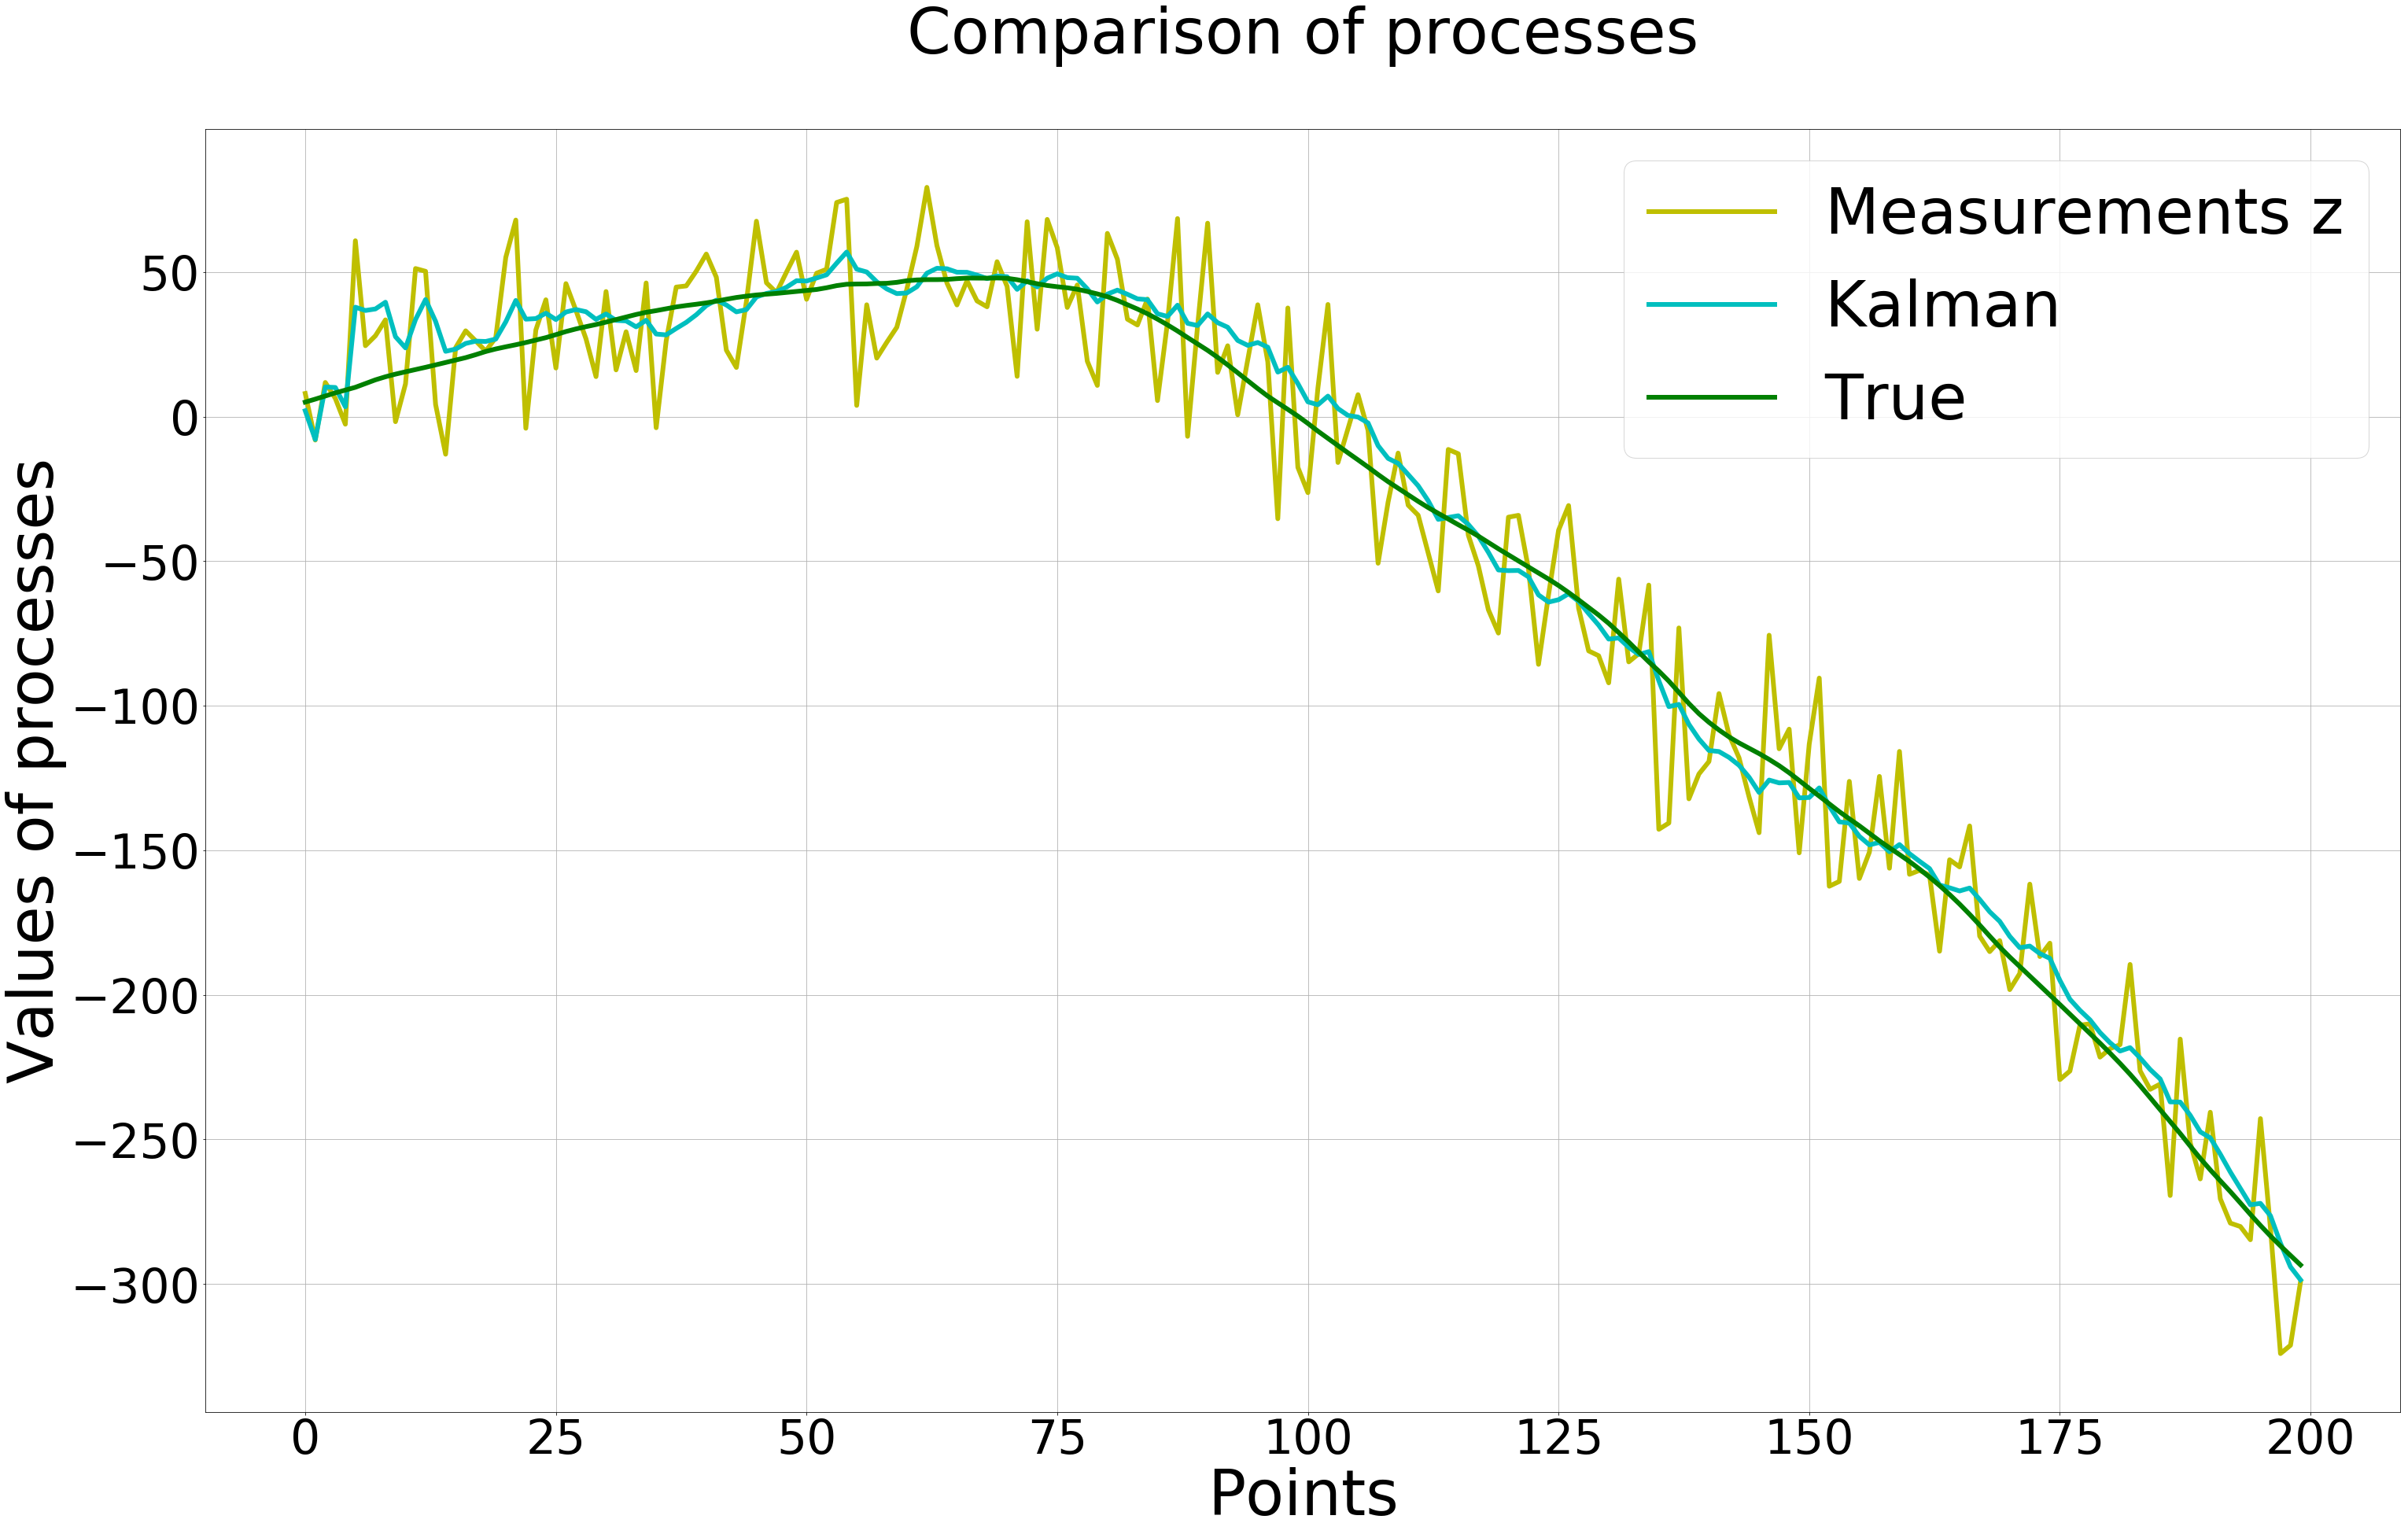

In [46]:
# Plotting of measurements, true values of process, running mean and exponential mean
plt.plot(z, linewidth = 6, label = "Measurements z", color = "y")
plt.plot(X_[0,:], linewidth = 6, label = "Kalman", color = "c")
plt.plot(X[0,:], linewidth = 6, label = "True", color = "g")
# plt.plot(sm, linewidth = 6, label = "Exponential forward mean", color = "g")
# plt.plot(sm_b, linewidth = 6, label = "Exponential backward mean", color = "r")
# plt.plot(run_mean, linewidth = 6, label = "Running mean", color = "r")
plt.legend(fontsize = 80)
plt.rcParams["figure.figsize"] = (50,30)
plt.tick_params(labelsize = 60)
plt.grid()
plt.xlabel("Points", fontsize = 80)
plt.ylabel("Values of processes", fontsize = 80)
plt.title("Comparison of processes\n", fontsize = 80)
plt.show()

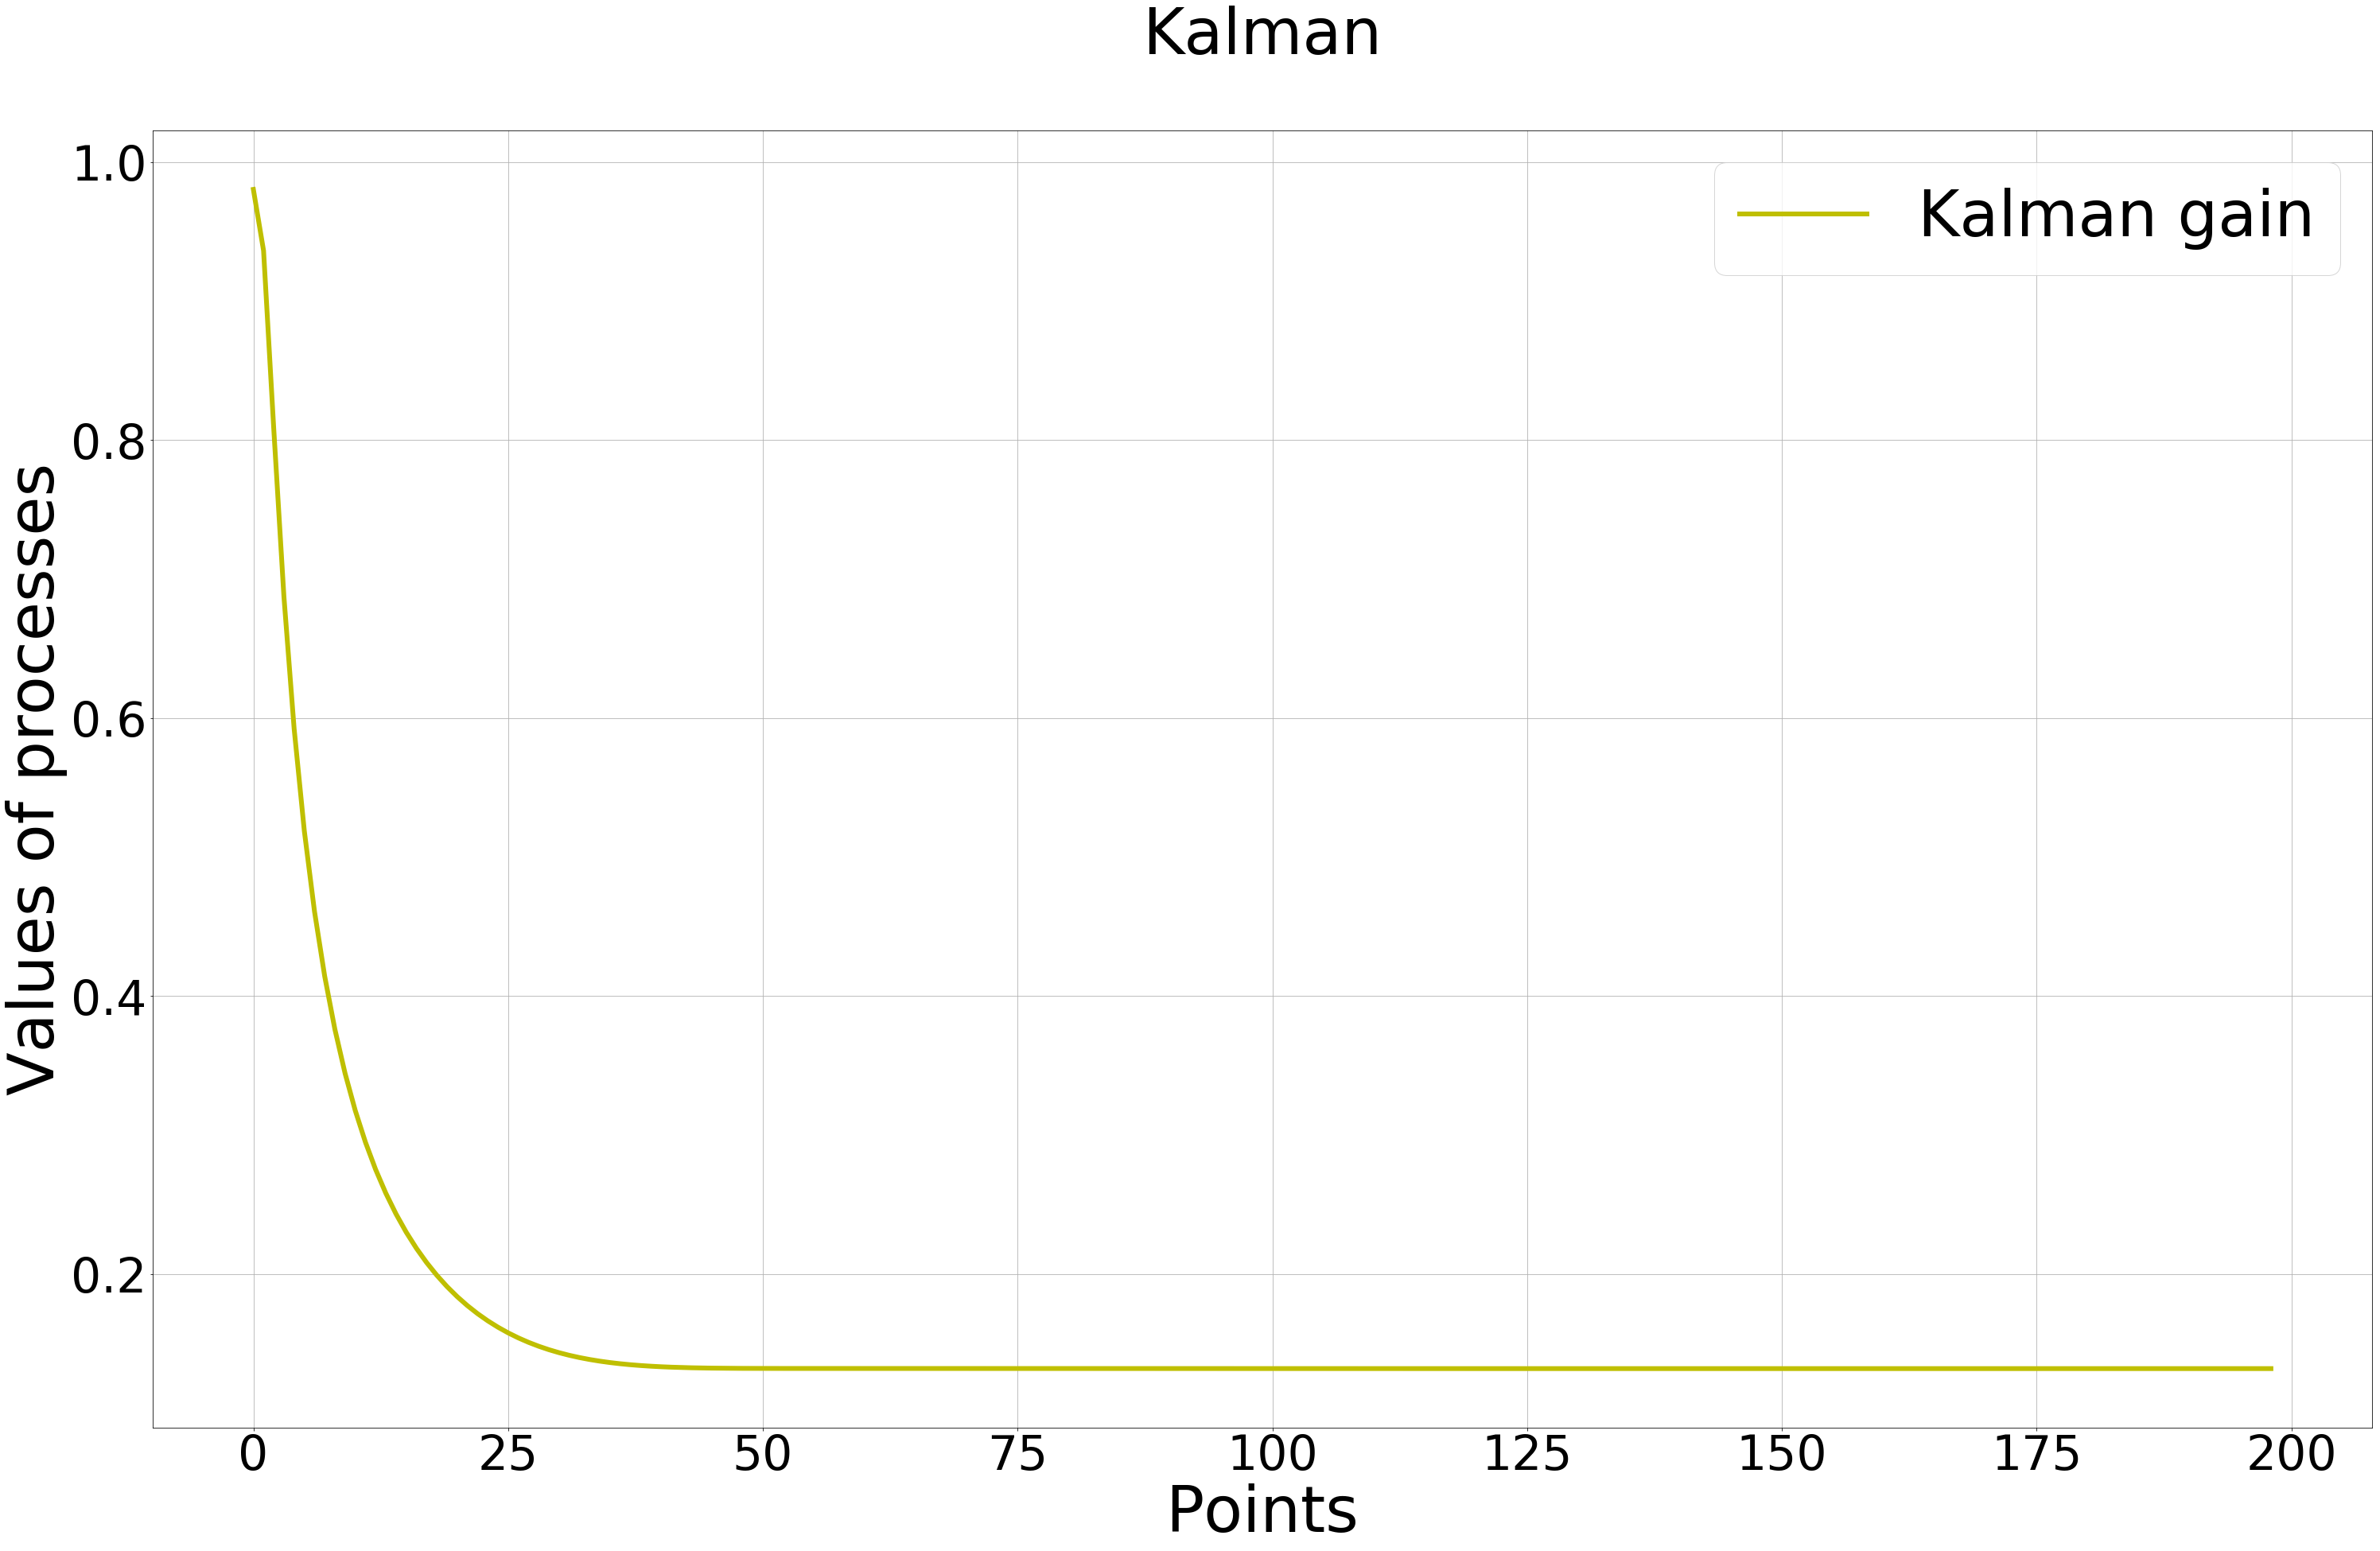

In [47]:
# Plotting of measurements, true values of process, running mean and exponential mean
plt.plot(K[0,:], linewidth = 6, label = "Kalman gain", color = "y")
plt.legend(fontsize = 80)
plt.rcParams["figure.figsize"] = (50,30)
plt.tick_params(labelsize = 60)
plt.grid()
plt.xlabel("Points", fontsize = 80)
plt.ylabel("Values of processes", fontsize = 80)
plt.title("Kalman\n", fontsize = 80)
plt.show()

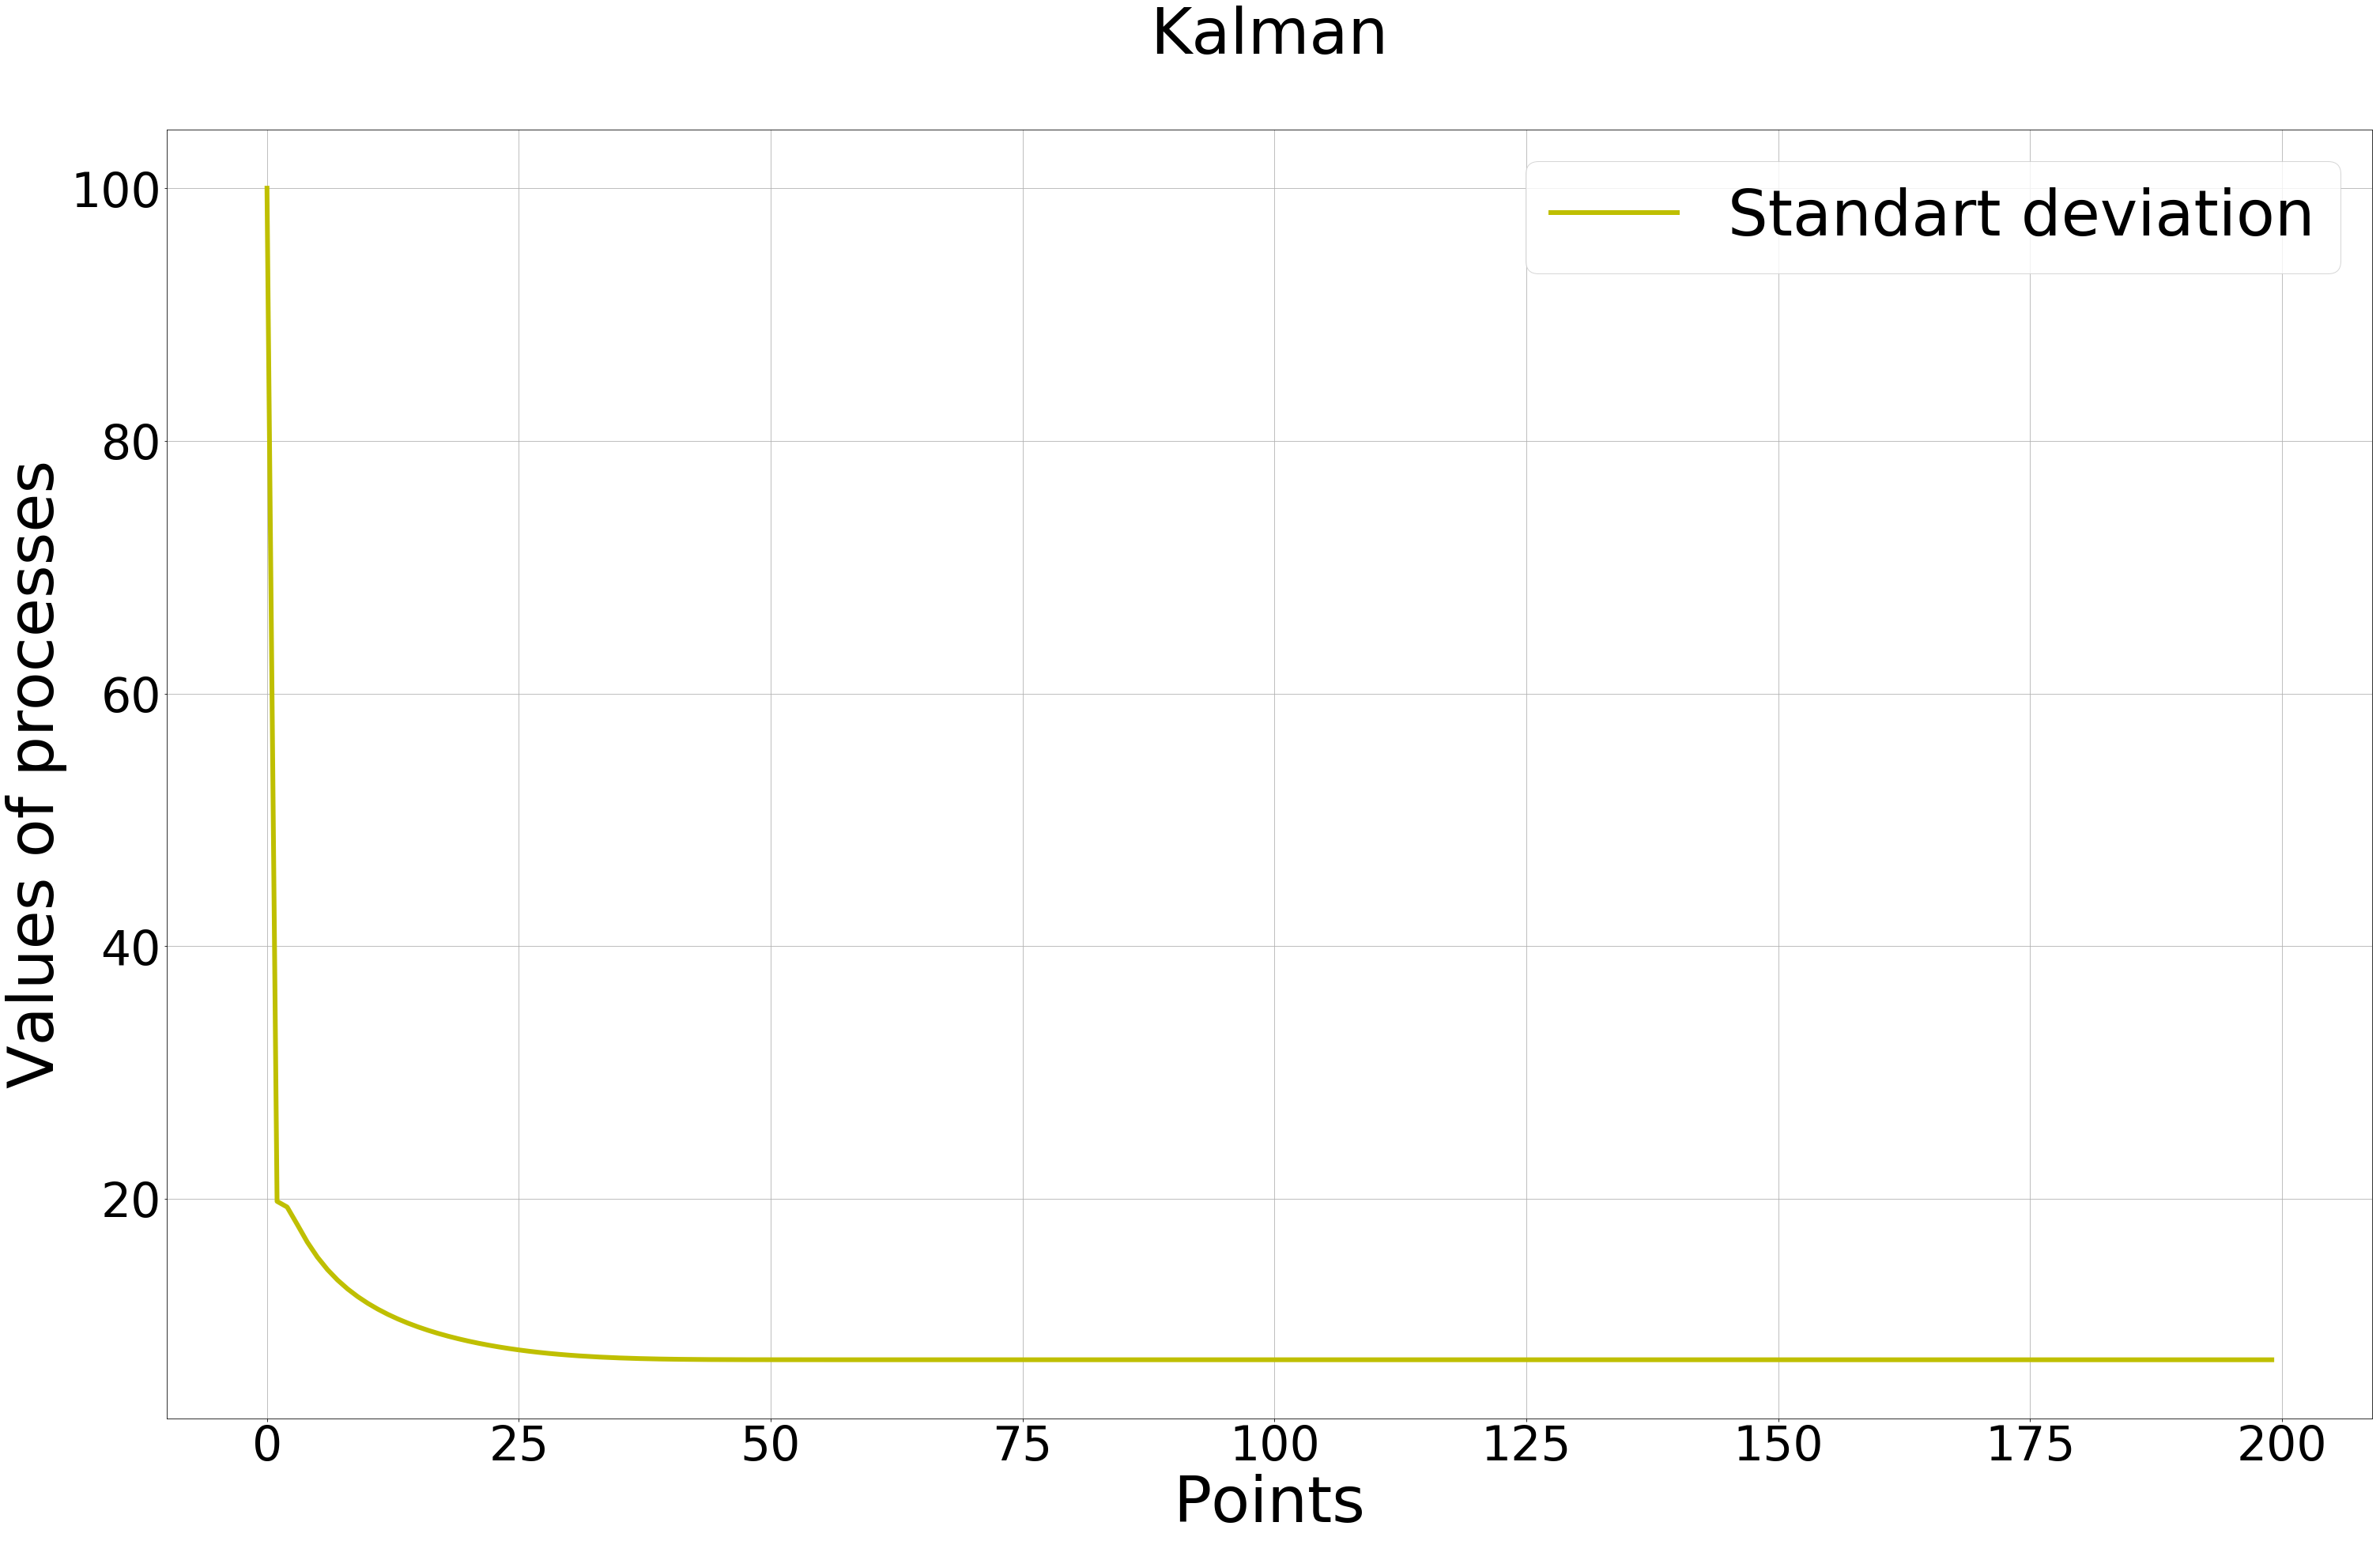

In [53]:
plt.plot(np.sqrt(P_[0,0,:]), linewidth = 6, label = "Standart deviation", color = "y")
plt.legend(fontsize = 80)
plt.rcParams["figure.figsize"] = (50,30)
plt.tick_params(labelsize = 60)
plt.grid()
plt.xlabel("Points", fontsize = 80)
plt.ylabel("Values of processes", fontsize = 80)
plt.title("Kalman\n", fontsize = 80)
plt.show()

In [64]:
# Task 7

X__1 = np.zeros((2,n+7))

for i in range(n):
    X__1[:,i+7] = F.dot(F).dot(F).dot(F).dot(F).dot(F).dot(X_[:,i].reshape(2,1)).reshape(2)

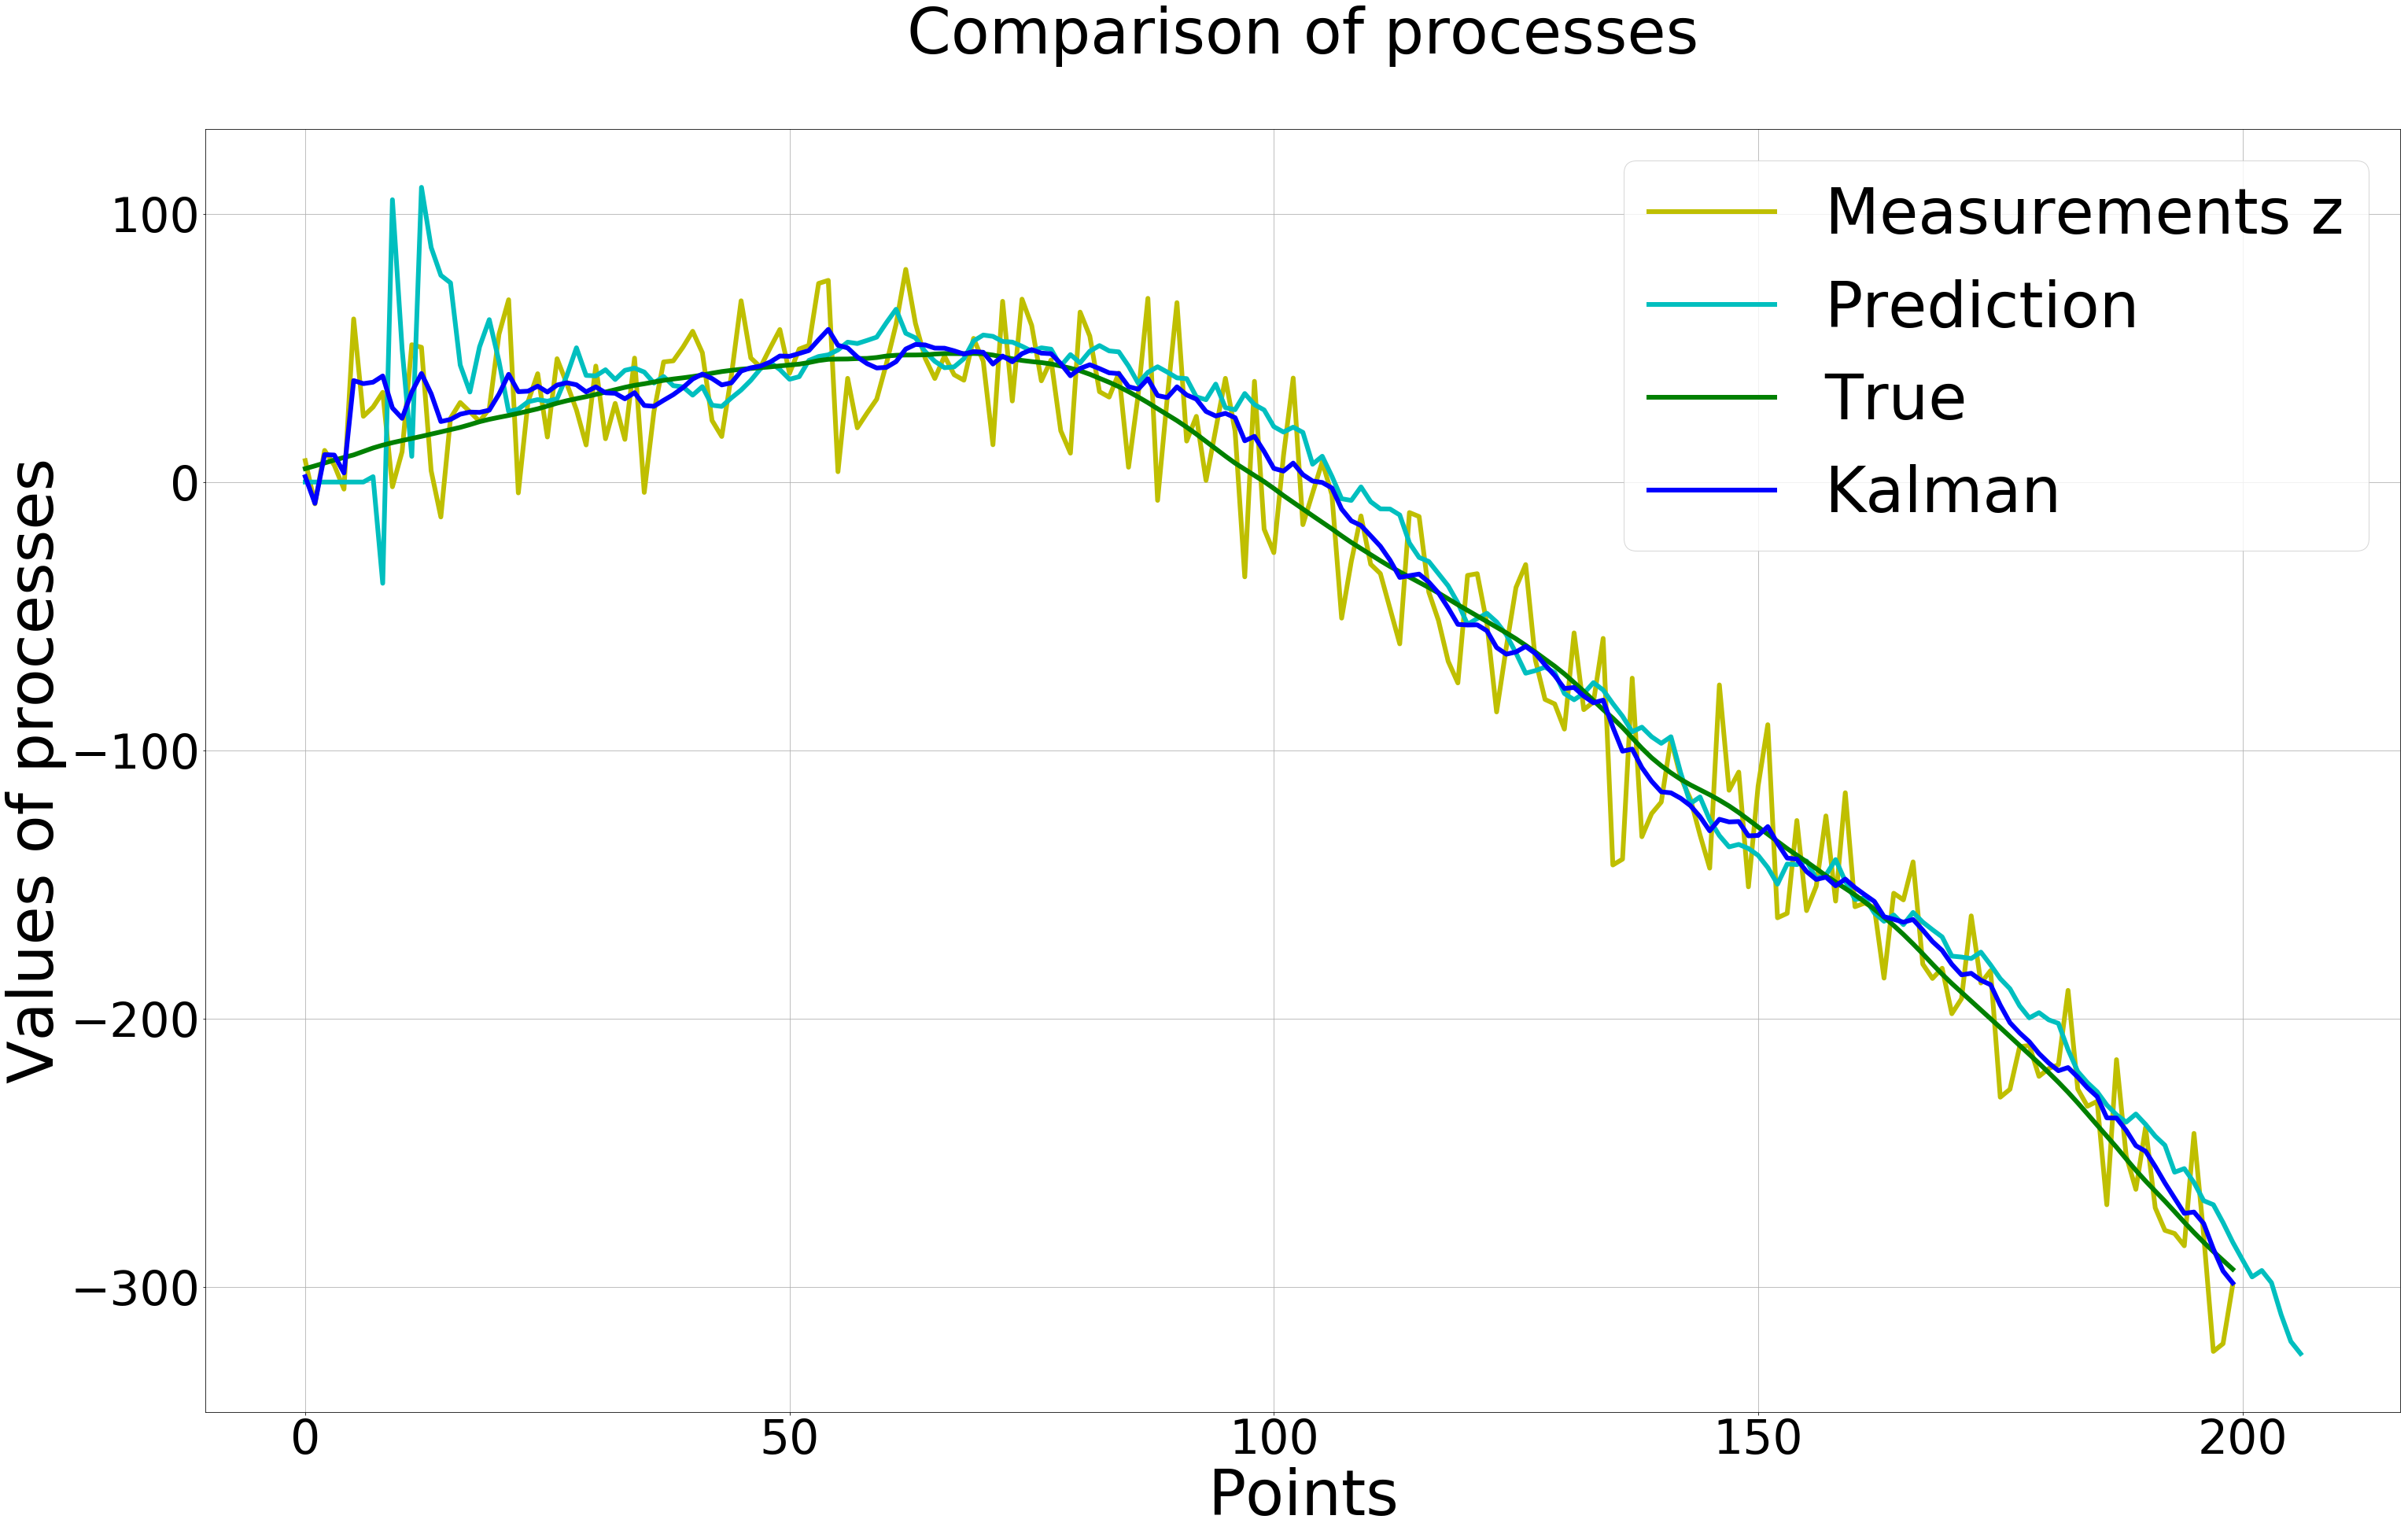

In [66]:
# Plotting of measurements, true values of process, running mean and exponential mean
plt.plot(z, linewidth = 6, label = "Measurements z", color = "y")
plt.plot(X__1[0,:], linewidth = 6, label = "Prediction", color = "c")
plt.plot(X[0,:], linewidth = 6, label = "True", color = "g")
plt.plot(X_[0,:], linewidth = 6, label = "Kalman", color = "b")
# plt.plot(sm, linewidth = 6, label = "Exponential forward mean", color = "g")
# plt.plot(sm_b, linewidth = 6, label = "Exponential backward mean", color = "r")
# plt.plot(run_mean, linewidth = 6, label = "Running mean", color = "r")
plt.legend(fontsize = 80)
plt.rcParams["figure.figsize"] = (50,30)
plt.tick_params(labelsize = 60)
plt.grid()
plt.xlabel("Points", fontsize = 80)
plt.ylabel("Values of processes", fontsize = 80)
plt.title("Comparison of processes\n", fontsize = 80)
plt.show()